In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv('Ecommerce Customers.csv')

In [13]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [14]:
#get some info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


notice the integers variables are the ones that will be usefull on this analysis of linear regression.(so from column 3-7 )

In [15]:
#get some stats information about the dataset
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


 EDA

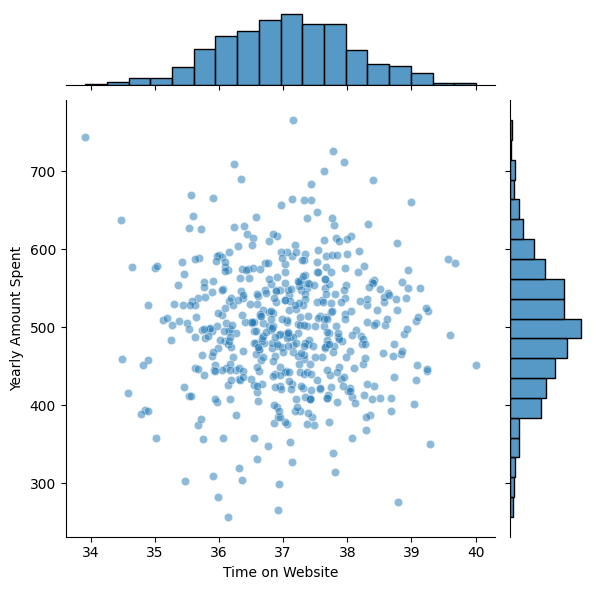

In [17]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df, alpha=0.5)

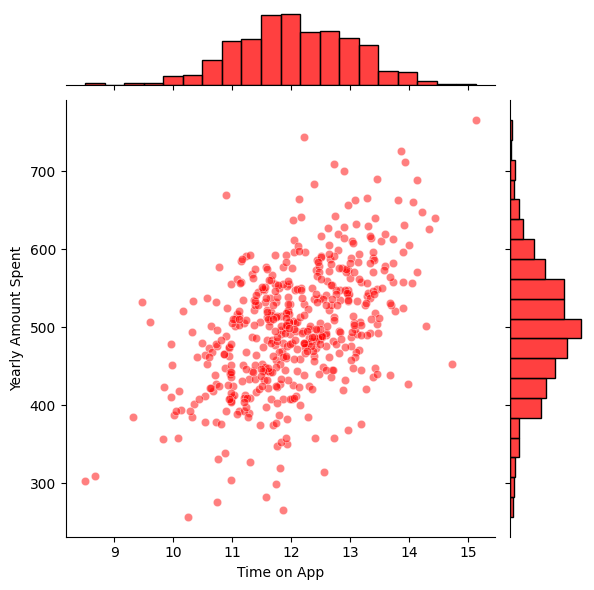

In [18]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df, color='red', alpha=0.5)

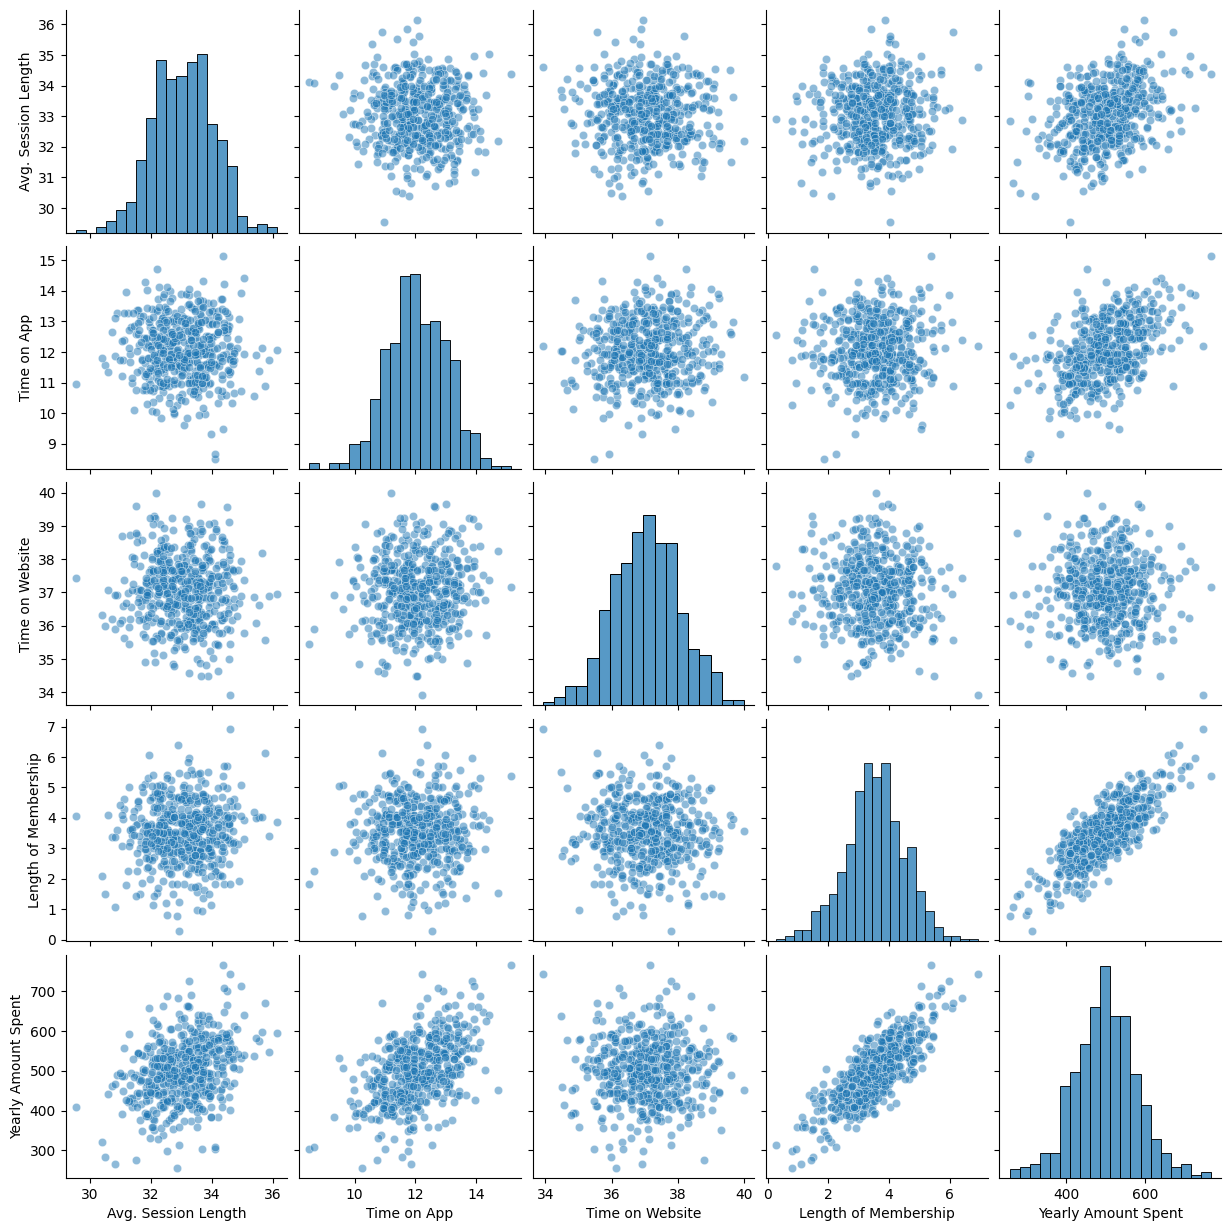

In [25]:
# create a jointplot to compare the Time on App and Length of Membership columns (or basically all numerical  columns)
sns.pairplot(df, kind='scatter', plot_kws={'alpha': 0.5})

notice the correlations

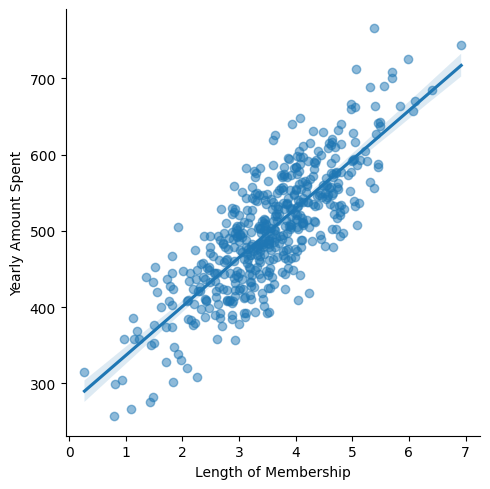

In [26]:
#this line shows the correlation between the Length of Membership and Yearly Amount Spent
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df ,scatter_kws={'alpha':0.5})

a line is created of the least squares of residuals(this is done iteratively)-typically this is linear regression and its behind the scenes. finding the equation of a line

In [27]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y=df['Yearly Amount Spent']
#now we have a predictor and a target variable

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2) #random state for reproducibility

In [30]:
x_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
119,33.889941,13.068639,37.540520,3.798725
335,32.133862,11.612651,39.248804,3.349245
192,33.694898,11.202670,35.493964,4.015987
178,32.635878,12.178573,35.674256,4.131755
283,33.077731,11.466984,35.675728,1.809230
...,...,...,...,...
22,31.531604,13.378563,38.734006,2.245148
72,32.386252,10.674653,38.006583,3.401522
493,32.060914,12.625433,35.539142,5.412358
15,30.737720,12.636606,36.213763,3.357847


In [31]:
x_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
129,32.771715,11.540832,37.526421,2.924021
280,32.271848,13.485009,37.550880,3.086337
440,33.200616,11.965980,36.831536,3.549036
384,33.593964,11.520567,36.189132,3.561215
225,32.836941,10.256549,36.143908,0.789520
...,...,...,...,...
17,32.338899,12.013195,38.385137,2.420806
479,34.606242,11.761884,38.126520,1.820811
357,34.002071,11.854682,37.491892,2.761862
332,33.144234,11.737041,37.935189,2.190132


In [32]:
y_train

119    571.307495
335    443.441860
192    505.119638
178    537.773163
283    374.269675
          ...    
22     436.515606
72     418.150081
493    627.603319
15     461.780742
168    506.536393
Name: Yearly Amount Spent, Length: 350, dtype: float64

In [33]:
#training the model using scikit-learn
from sklearn.linear_model import LinearRegression

In [34]:
lm=LinearRegression() #create an instance of the linear regression model

In [35]:
lm.fit(x_train,y_train) #fit the model to the training data

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
#take a look at the coefficients
lm.coef_

array([25.73355935, 38.74177284,  0.74764502, 61.43626237])

In [38]:
cdf=pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
cdf # THE HIGHER THE COEFFICIENT THE MORE IMPACT IT HAS ON THE TARGET VARIABLE

,Coefficient
Avg. Session Length,25.733559
Time on App,38.741773
Time on Website,0.747645
Length of Membership,61.436262


In [40]:
#MAKE PREDICTIONS USING THE TEST DATA
predictions=lm.predict(x_test)

In [41]:
predictions #returns an array of predicted values

array([435.06293109, 507.51083624, 500.45014818, 493.58421927,
       254.81662521, 506.92850087, 380.42947746, 573.42565426,
       483.48772013, 604.58346696, 499.95494046, 411.11013645,
       365.15179701, 584.44986191, 475.44910056, 553.90262322,
       564.56837627, 535.26297763, 441.75265965, 538.48145565,
       419.05720998, 511.21273444, 550.88173333, 531.09491979,
       765.698952  , 450.36558945, 457.09333327, 548.74767588,
       413.86195203, 534.92305953, 515.33549346, 538.66026305,
       692.60227935, 563.22927028, 456.84209485, 425.19421702,
       380.45850896, 331.48687004, 456.43092881, 283.56039174,
       531.79890137, 703.08765136, 487.3359305 , 526.39131664,
       493.65515956, 478.83492675, 486.40228653, 388.45819109,
       464.37249248, 549.21080917, 418.60053389, 371.89348693,
       375.26070649, 523.41883999, 487.27655441, 517.54274192,
       577.07387677, 478.15404036, 530.5870536 , 572.82967731,
       404.68177322, 399.69849767, 501.88890507, 445.15

Text(0, 0.5, 'Actual Values')

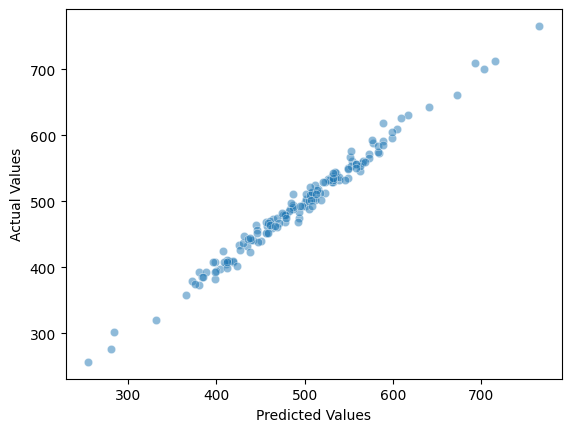

In [44]:
#lets the predicted values against the actual values
sns.scatterplot(x=predictions,y=y_test, alpha=0.5)
xlabeled='Predicted Values'
ylabeled='Actual Values'
title='Predicted vs Actual Values'
plt.xlabel(xlabeled)
plt.ylabel(ylabeled)

model seems to have generalized great

In [48]:
#evaluate the model with some metrics from scikit-learn
import math
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', math.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.546199505771416
MSE: 91.04368442944202
RMSE: 9.541681425694426


In [50]:
# MAE-tells the average distance between the predicted values and the actual values -so we will be having an error of about 7.54 dollars which is not that much recalling we get 500 dollars yearly
# MSE-penalizes larger errors more than smaller ones.we have an average squared error of about 91.04 dollars
# RMSE-is the square root of MSE and is interpretable in the same way as MAE

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

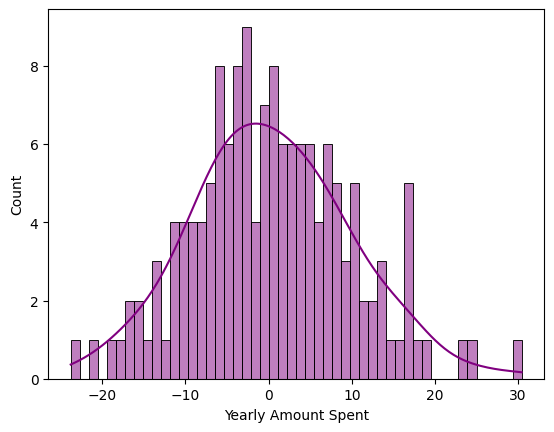

In [52]:
#analyze the residuals
sns.histplot((y_test - predictions), bins=50, kde=True, color='purple')

In [54]:
#check the residuals
residuals=y_test - predictions
residuals


129    -3.445197
280     4.469024
440    -1.309996
384   -19.051890
225     1.853957
         ...    
17     -4.247039
479   -21.340207
357    -7.266929
332    16.733958
345    -4.131456
Name: Yearly Amount Spent, Length: 150, dtype: float64

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

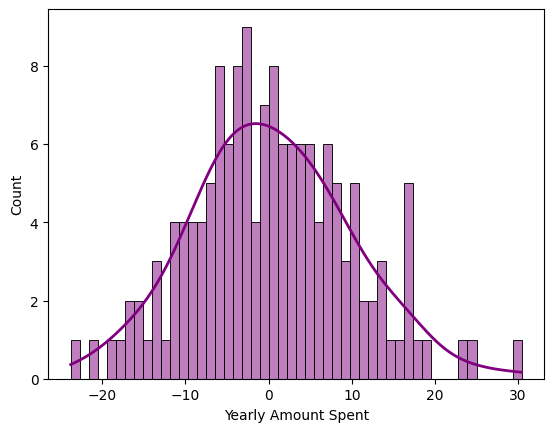

In [66]:
#test for normality
#since linear models assumes that the residuals are normally distributed(they should be randomly distributed around a mean of zero) otherwise it ll be biased
sns.histplot(
    residuals,
    bins=50,
    color='purple',
    alpha=0.5,
    kde=True,
    line_kws={'color': 'yellow', 'lw': 2}
)



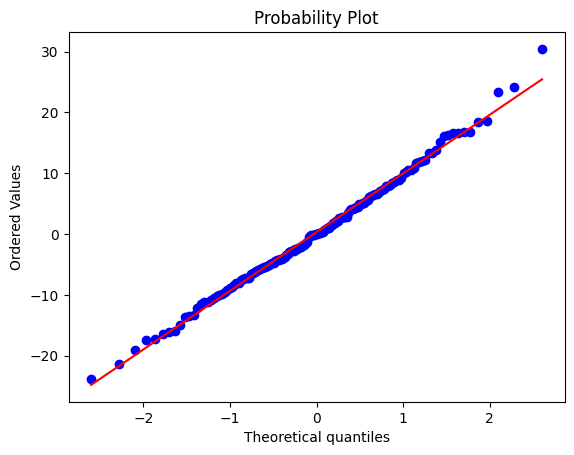

In [67]:
#using q-q plot to test for normality
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()